In [53]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model


# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import seaborn as sns

from sklearn.manifold import TSNE


In [54]:
path = r"D:\Ambis Kuliah\Semester 7\NAIST Internship\Breast Cancer Project\Program\Final Data for Model\train\cancer"

os.chdir(path)


mammography = []


with os.scandir(path) as files :
    for file in files :
        if file.name.endswith('.jpg'):
            mammography.append(file.name)
            
print(mammography[:15])

['A_1000_1.LEFT_CC_crop_0.jpg', 'A_1000_1.LEFT_MLO_crop_0.jpg', 'A_1000_1.RIGHT_CC_crop_0.jpg', 'A_1000_1.RIGHT_MLO_crop_0.jpg', 'A_1001_1.LEFT_CC_crop_0.jpg', 'A_1001_1.LEFT_MLO_crop_0.jpg', 'A_1001_1.RIGHT_CC_crop_0.jpg', 'A_1001_1.RIGHT_MLO_crop_0.jpg', 'A_1002_1.LEFT_CC_crop_0.jpg', 'A_1002_1.LEFT_MLO_crop_0.jpg', 'A_1002_1.RIGHT_CC_crop_0.jpg', 'A_1002_1.RIGHT_MLO_crop_0.jpg', 'A_1003_1.LEFT_CC_crop_0.jpg', 'A_1003_1.LEFT_MLO_crop_0.jpg', 'A_1003_1.RIGHT_CC_crop_0.jpg']


In [55]:
# load model
model=load_model(r"D:\Ambis Kuliah\Semester 7\NAIST Internship\Breast Cancer Project\Program\bcancer_modelv3.h5")
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        1849

In [56]:
def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [57]:
import pickle

data = {}

p = r"D:\Ambis Kuliah\Semester 7\NAIST Internship\Breast Cancer Project\Program\feat.pkl"

with open(p, "wb") as f:
    for mamph in mammography:
        try:
            feat = extract_features(mamph, model)

            data[mamph] = feat
        except:
            pickle.dump(data, f)

f.close()

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


In [58]:
filenames = np.array(list(data.keys()))

feat = np.array(list(data.values()))
feat.shape

feat[0]

array([[    0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
         1413.1664,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    , 13818.998 ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,  8136.004 ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     

In [59]:
feat = feat.reshape(-1,512)
feat.shape

(2733, 512)

In [60]:
tsne = TSNE(n_components=2, random_state=42)
tsne1 = tsne.fit_transform(feat)

tsne.kl_divergence_

0.7059262990951538

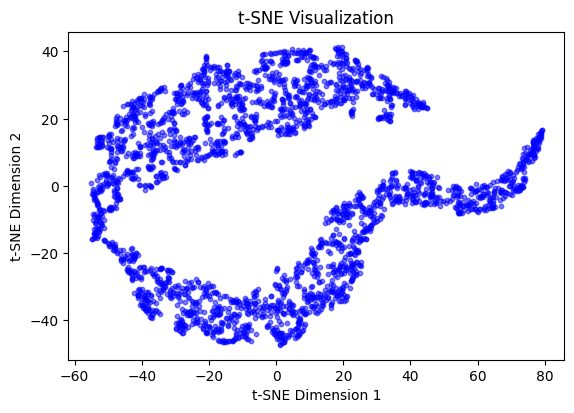

In [61]:
tx = tsne1[:, 0]
ty = tsne1[:, 1]

fig, ax = plt.subplots()
ax.scatter(tx, ty, s=10, alpha=0.5, color="blue")

ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")

ax.set_title("t-SNE Visualization")

ax.set_aspect("equal")
plt.show()


In [18]:
kmeans = KMeans(n_clusters=8, random_state=22)
kmeans.fit(feat)

C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\breast-cancer\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=22)

In [19]:
tsne = TSNE(n_components=2,random_state=42)
tsne_kmeans = tsne.fit_transform(feat)



In [20]:
'''
fig, ax = plt.subplots()
ax.scatter(tsne_kmeans[:, 0], tsne_kmeans[:, 1], c=kmeans.labels_, alpha=0.7, cmap='tab20')


ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")

ax.set_title("SNE Visualization of KMeans Clustered Before TSNE")

ax.set_aspect("equal")
plt.show()
'''

'\nfig, ax = plt.subplots()\nax.scatter(tsne_kmeans[:, 0], tsne_kmeans[:, 1], c=kmeans.labels_, alpha=0.7, cmap=\'tab20\')\n\n\nax.set_xlabel("t-SNE Dimension 1")\nax.set_ylabel("t-SNE Dimension 2")\n\nax.set_title("SNE Visualization of KMeans Clustered Before TSNE")\n\nax.set_aspect("equal")\nplt.show()\n'

In [21]:
#Hierarchy Based Clustering 
from sklearn.cluster import AgglomerativeClustering

ward  = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
#single  = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='single')
#average  = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='average')
#complete  = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='complete')

labels = ward.fit_predict(feat)
print(labels)

[1 3 5 ... 0 1 7]


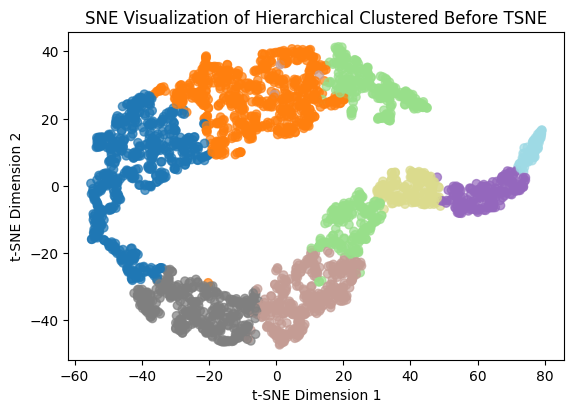

In [22]:
fig, ax = plt.subplots()
ax.scatter(tsne1[:, 0], tsne1[:, 1], c=labels, alpha=0.7, cmap='tab20')


ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")

ax.set_title("SNE Visualization of Hierarchical Clustered Before TSNE")

ax.set_aspect("equal")
plt.show()

In [23]:
'''
#TSNE Clustering 


ward1  = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
labels1 = ward.fit_predict(tsne1)


kmeans1 = KMeans(n_clusters=8, random_state=22)
kmeans1.fit(tsne1)
'''

"\n#TSNE Clustering \n\n\nward1  = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')\nlabels1 = ward.fit_predict(tsne1)\n\n\nkmeans1 = KMeans(n_clusters=8, random_state=22)\nkmeans1.fit(tsne1)\n"

In [24]:
'''
fig, ax = plt.subplots()
ax.scatter(tsne1[:, 0], tsne1[:, 1], c=labels1, alpha=0.7, cmap='tab20')


ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")

ax.set_title("SNE Visualization of Hierarchical Feature Vectors")

ax.set_aspect("equal")
plt.show()
'''

'\nfig, ax = plt.subplots()\nax.scatter(tsne1[:, 0], tsne1[:, 1], c=labels1, alpha=0.7, cmap=\'tab20\')\n\n\nax.set_xlabel("t-SNE Dimension 1")\nax.set_ylabel("t-SNE Dimension 2")\n\nax.set_title("SNE Visualization of Hierarchical Feature Vectors")\n\nax.set_aspect("equal")\nplt.show()\n'

In [25]:
'''
fig, ax = plt.subplots()
ax.scatter(tsne1[:, 0], tsne1[:, 1], c=kmeans1.labels_, alpha=0.7, cmap='tab20')


ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")

ax.set_title("SNE Visualization of KMeans Feature Vectors")

ax.set_aspect("equal")
plt.show()
'''

'\nfig, ax = plt.subplots()\nax.scatter(tsne1[:, 0], tsne1[:, 1], c=kmeans1.labels_, alpha=0.7, cmap=\'tab20\')\n\n\nax.set_xlabel("t-SNE Dimension 1")\nax.set_ylabel("t-SNE Dimension 2")\n\nax.set_title("SNE Visualization of KMeans Feature Vectors")\n\nax.set_aspect("equal")\nplt.show()\n'

In [62]:
tsne_3d = TSNE(n_components=3,random_state=42)
tsne_3d= tsne_3d.fit_transform(feat)

In [63]:
tsne_3d_df = pd.DataFrame(tsne_3d, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
tsne_3d_df['labels'] = labels
tsne_3d_df['distance'] = 3


# Plot the t-SNE transformed data using Plotly Express
fig = px.scatter_3d(tsne_3d_df, x='Dimension 1', y='Dimension 2', z='Dimension 3', color='labels', size='distance', symbol='labels', opacity=0.7)
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [83]:
a = pd.DataFrame(feat)

In [71]:
a.to_excel(r'D:\Ambis Kuliah\Semester 7\NAIST Internship\Breast Cancer Project\Program\feature.xlsx')

In [79]:
b = pd.read_excel(r'D:\Ambis Kuliah\Semester 7\NAIST Internship\Breast Cancer Project\Program\feature.xlsx')

Index(['Unnamed: 0',            0,            1,            2,            3,
                  4,            5,            6,            7,            8,
       ...
                502,          503,          504,          505,          506,
                507,          508,          509,          510,          511],
      dtype='object', length=513)

In [84]:
#Hierarchy Based Clustering 
from sklearn.cluster import AgglomerativeClustering

ward  = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')


labels = ward.fit_predict(b.values)
print(labels)

[0 1 0 ... 2 0 1]


In [85]:
tsne3clus = TSNE(n_components=3,random_state=42)
tsne3clus= tsne3clus.fit_transform(feat)

In [86]:
tsne_3d_df = pd.DataFrame(tsne3clus, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
tsne_3d_df['labels'] = labels
tsne_3d_df['distance'] = 3


# Plot the t-SNE transformed data using Plotly Express
fig = px.scatter_3d(tsne_3d_df, x='Dimension 1', y='Dimension 2', z='Dimension 3', color='labels', size='distance', symbol='labels', opacity=0.7)
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [87]:
#Hierarchy Based Clustering 
from sklearn.cluster import AgglomerativeClustering

ward  = AgglomerativeClustering(n_clusters=22, metric='euclidean', linkage='ward')


labels = ward.fit_predict(a)
#print(labels)

In [88]:
tsne4clus = TSNE(n_components=3,random_state=42)
tsne4clus= tsne4clus.fit_transform(feat)

tsne4clus_ = TSNE(n_components=2,random_state=42)
tsne4clus_= tsne4clus_.fit_transform(feat)

In [89]:
tsne_3d_df = pd.DataFrame(tsne4clus, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
tsne_3d_df['labels'] = labels
tsne_3d_df['distance'] = 3


# Plot the t-SNE transformed data using Plotly Express
fig = px.scatter_3d(tsne_3d_df, x='Dimension 1', y='Dimension 2', z='Dimension 3', color='labels', size='distance', symbol='labels', opacity=0.7)
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

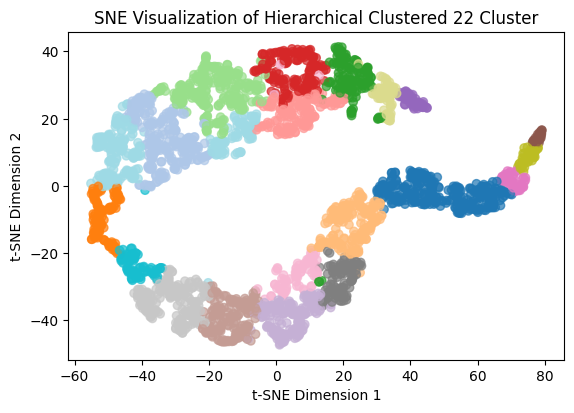

In [90]:
fig, ax = plt.subplots()
ax.scatter(tsne4clus_[:, 0], tsne4clus_[:, 1], c=labels, alpha=0.7, cmap='tab20')


ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")

ax.set_title("SNE Visualization of Hierarchical Clustered 22 Cluster")

ax.set_aspect("equal")
plt.show()